In [2]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = [10, 6]

# Analiza dynamiki fiksacji
## Analiza A - dynamika w funkcji wybranej odpowiedzi

In [3]:
Lmin = 10
Lmax = 118
results = 'results_classic'

<IPython.core.display.Javascript object>


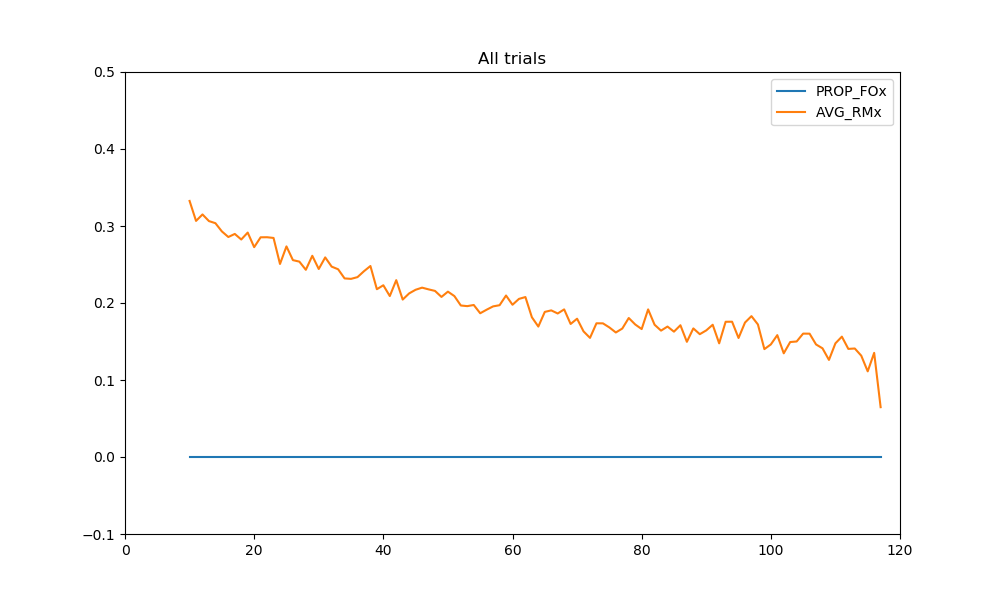

In [4]:
### Wszystkie triale
full = pd.read_csv(join(results, 'dynamics_full.csv'))
full[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'All trials',xlim=[0, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


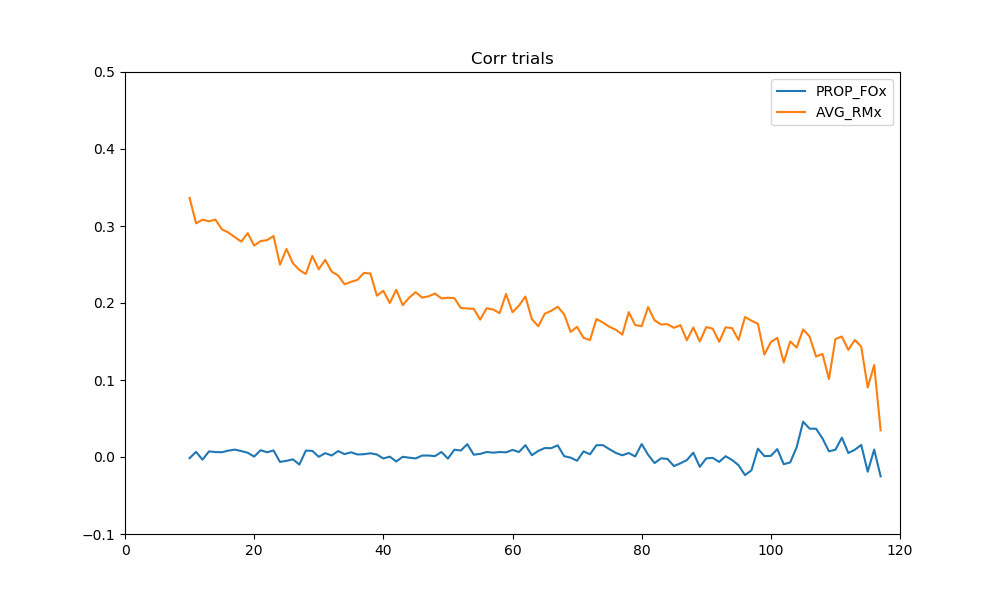

In [5]:
corr = pd.read_csv(join(results, 'dynamics_corr.csv'))
corr[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Corr trials', xlim=[0, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


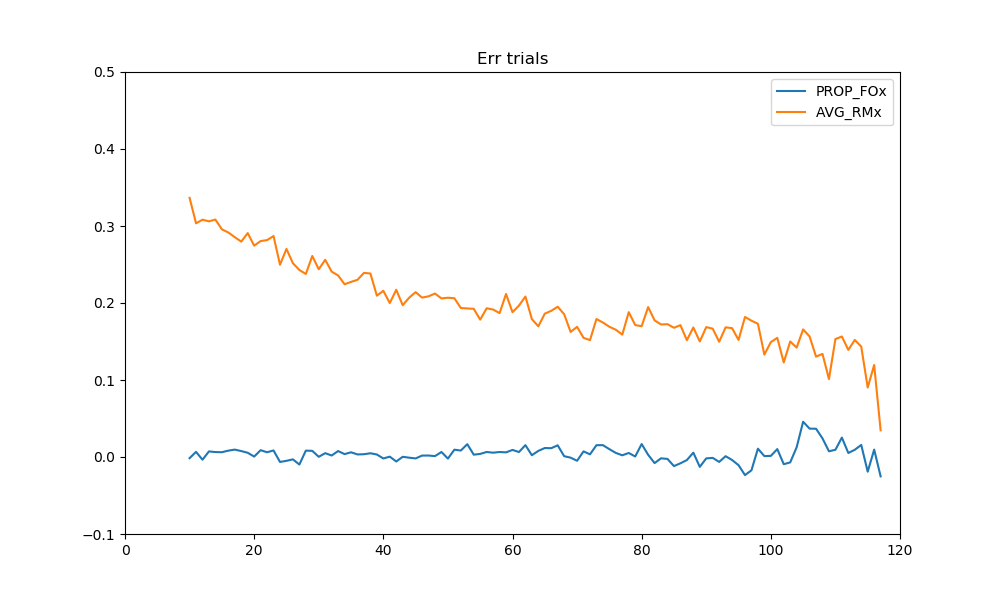

In [6]:
err = pd.read_csv(join(results, 'dynamics_err.csv'))
err[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Err trials', xlim=[0, 120], ylim=[-0.1,0.5])

## Analiza B - czy czas rozwiązywania triala wpływa jakoś na dynamikę?

<IPython.core.display.Javascript object>


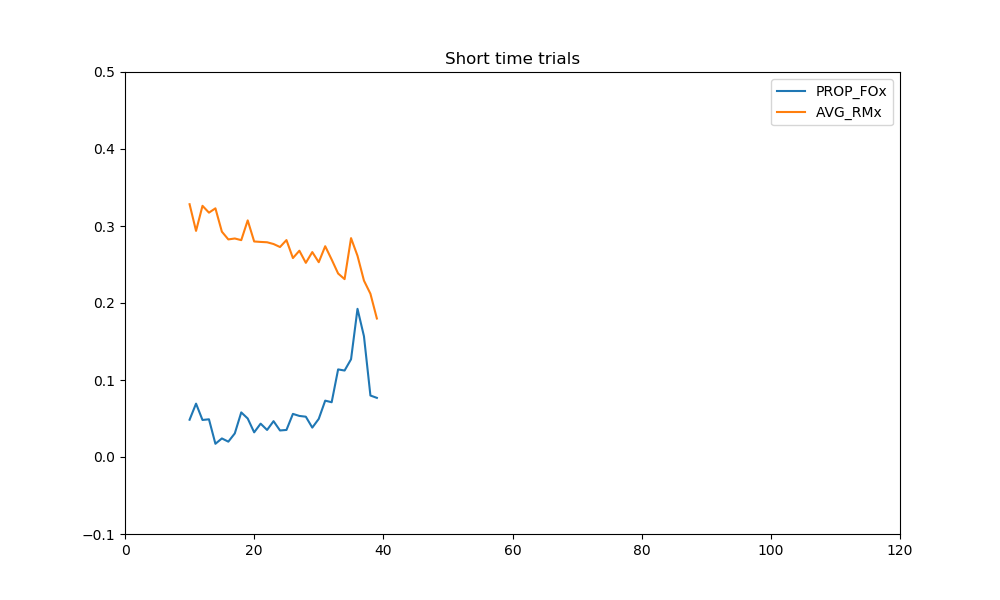

In [7]:
time_short = pd.read_csv(join(results, 'dynamics_time_short.csv'))
time_short[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Short time trials', xlim=[0, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


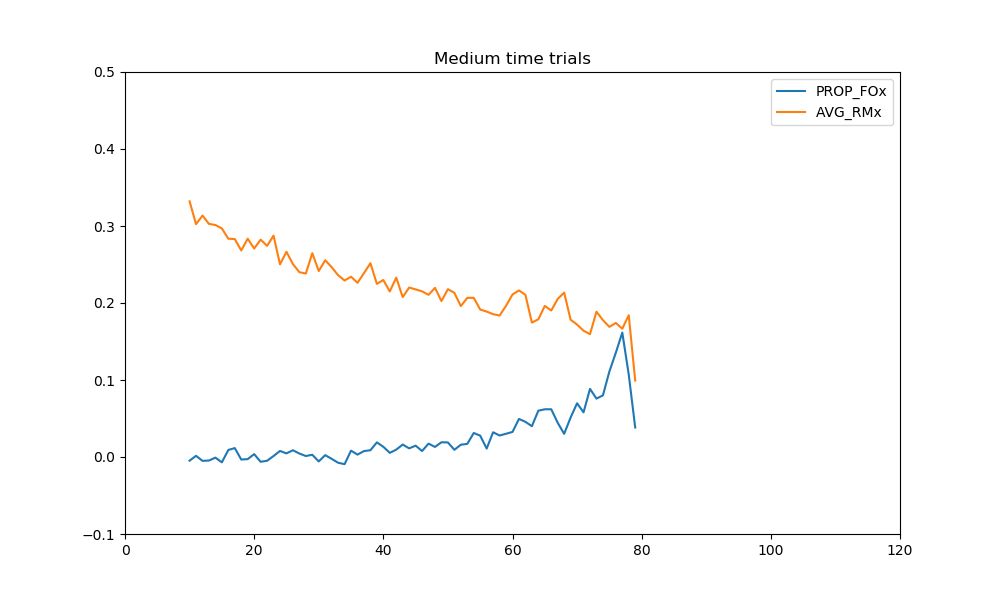

In [8]:
time_med = pd.read_csv(join(results, 'dynamics_time_med.csv'))
time_med[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium time trials', xlim=[0, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


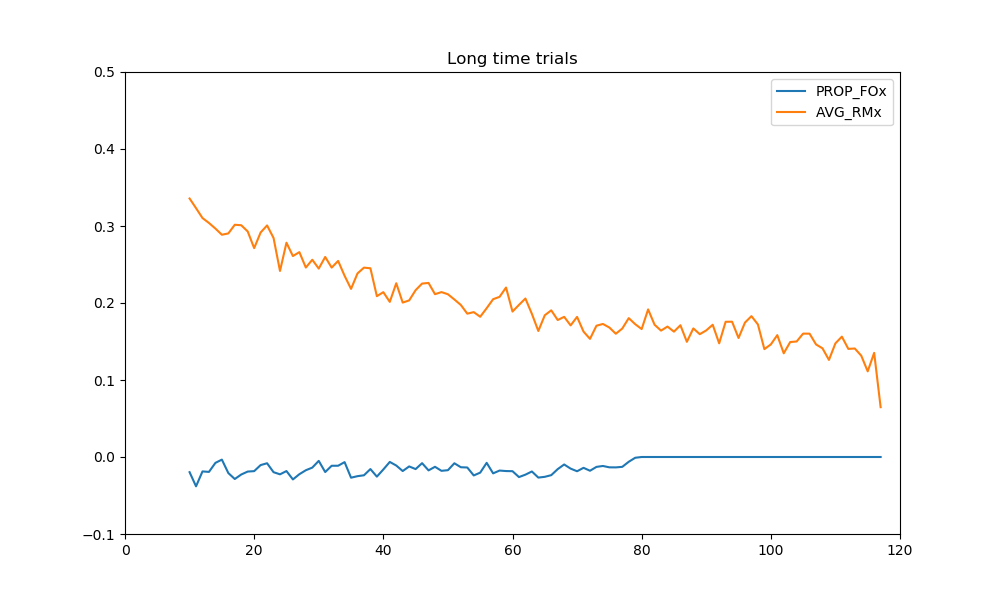

In [9]:
time_long = pd.read_csv(join(results, 'dynamics_time_long.csv'))
time_long[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Long time trials', xlim=[0, 120], ylim=[-0.1,0.5])

## Analiza C - EASY, MEDIUM, HARD

<IPython.core.display.Javascript object>


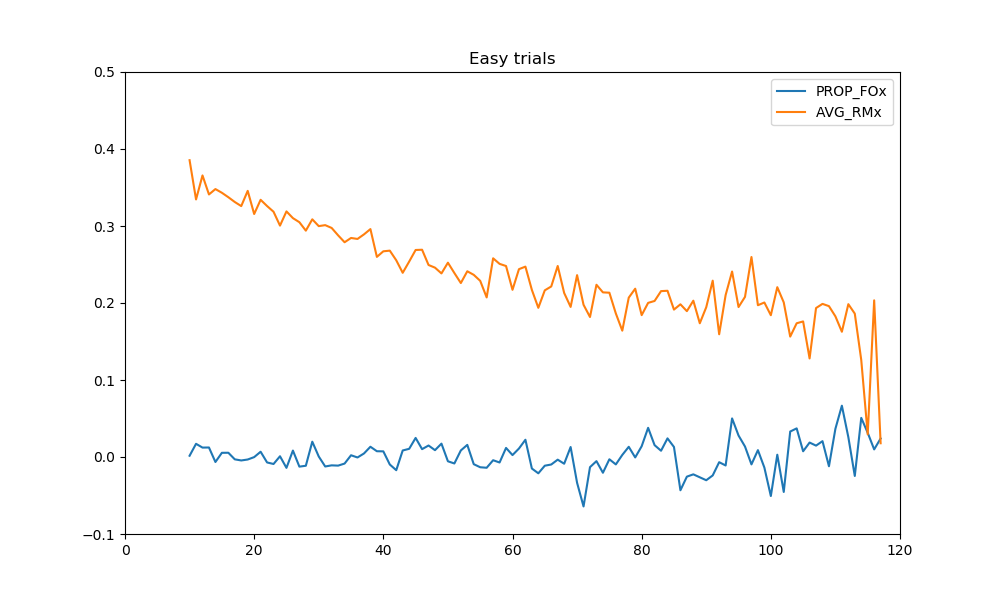

In [10]:
lev_easy = pd.read_csv(join(results, 'dynamics_lev_easy.csv'))
lev_easy[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Easy trials', xlim=[0, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


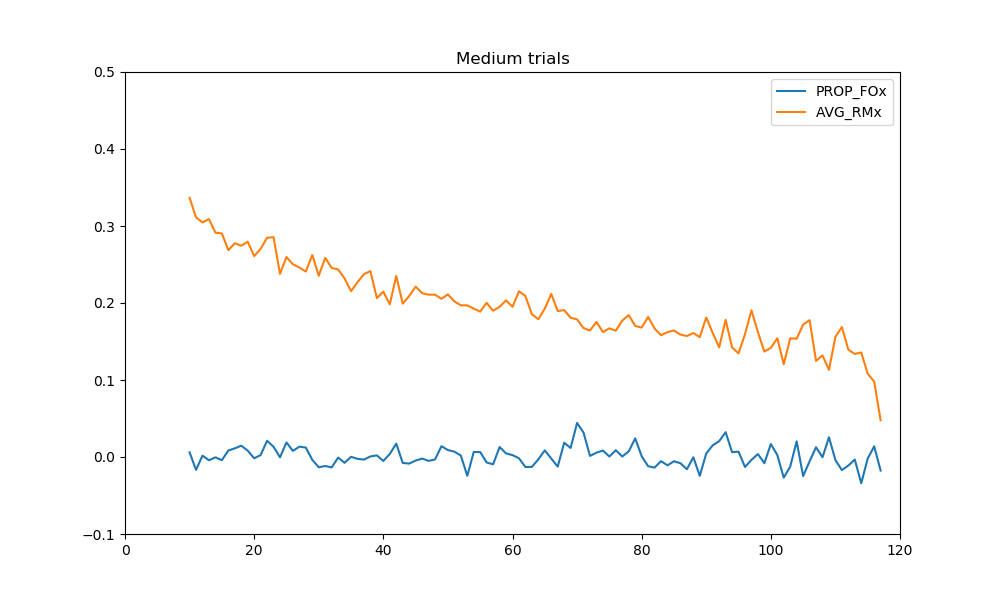

In [11]:
lev_med = pd.read_csv(join(results, 'dynamics_lev_med.csv'))
lev_med[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium trials', xlim=[0, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


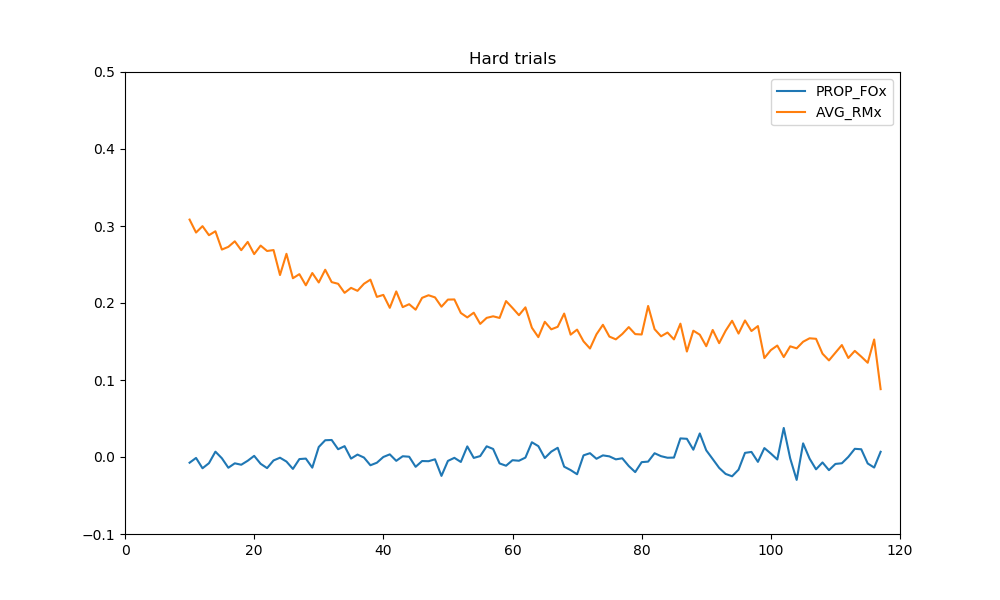

In [12]:
lev_hard = pd.read_csv(join(results, 'dynamics_lev_hard.csv'))
lev_hard[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Hard trials', xlim=[0, 120], ylim=[-0.1,0.5])

## Analiza D - dynamika w funkcji WMC (low, medium, high)

<IPython.core.display.Javascript object>


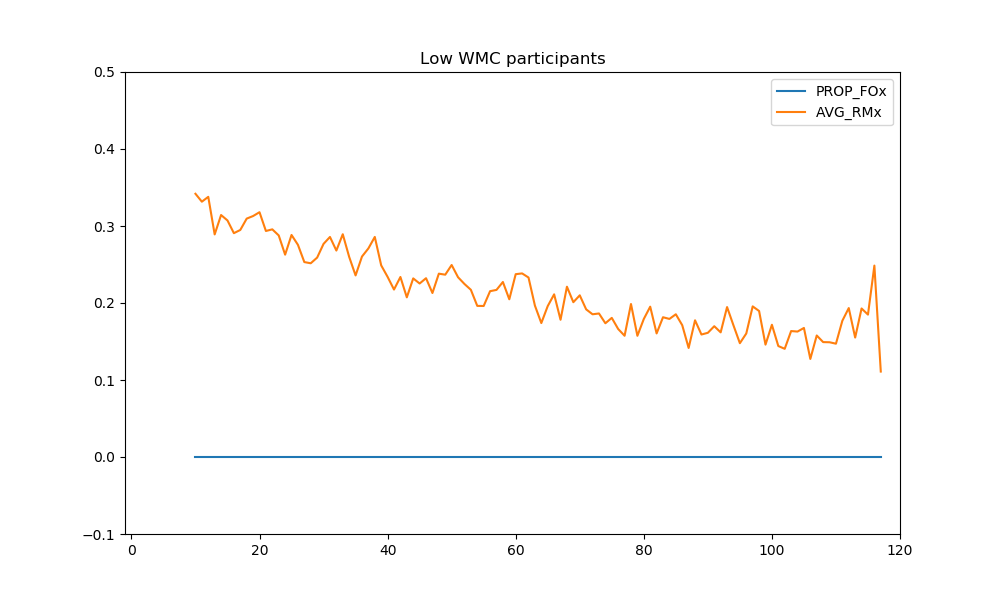

In [13]:
wmc_low = pd.read_csv(join(results, 'dynamics_wmc_low.csv'))
wmc_low[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Low WMC participants', xlim=[-1, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


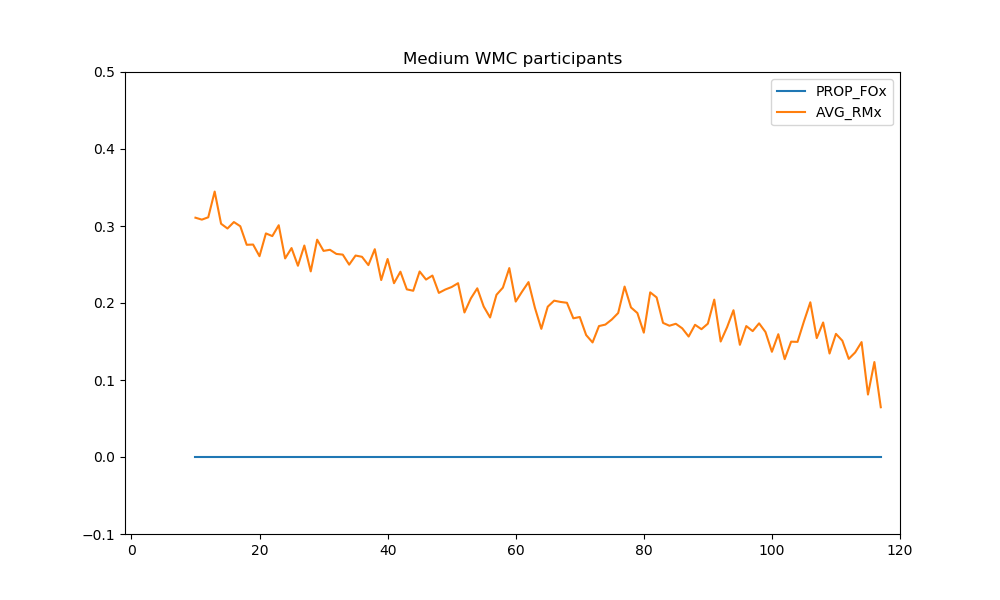

In [14]:
wmc_med = pd.read_csv(join(results, 'dynamics_wmc_med.csv'))
wmc_med[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium WMC participants', xlim=[-1, 120], ylim=[-0.1,0.5])

<IPython.core.display.Javascript object>


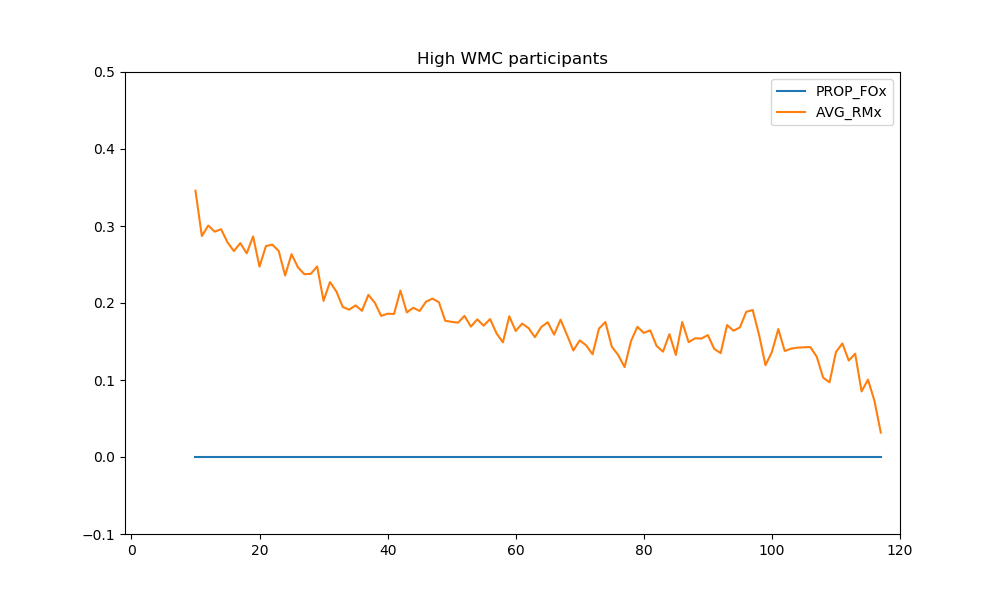

In [15]:
wmc_high = pd.read_csv(join(results, 'dynamics_wmc_high.csv'))
wmc_high[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'High WMC participants', xlim=[-1, 120], ylim=[-0.1,0.5])

# Predziały ufności
1.96 razy odchylenie standardowe danej miary (tzn. albo PROP_FO albo AVG_RM) podzielone przez pierwiastek kwadratowy z liczby triali dla tej sekundy (czyli Kx): 1.96*(SDx/SQRT(Kx)) [inaczej 1.96 razy błąd standardowy miary w danej sekundzie].

In [16]:
def add_CI_PROP(data):
    data["PROP_FOx_low_CI"] = data['PROP_FOx'] -  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    data["PROP_FOx_high_CI"] = data["PROP_FOx"] +  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    
def add_CI_RM(data):
    data["AVG_RMx_low_CI"] = data['AVG_RMx'] -  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    data["AVG_RMx_high_CI"] = data['AVG_RMx'] +  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    
def plot_CI(data, param,labels, title):
    # Define a function for the line plot with intervals
    _, ax = plt.subplots()

    # Plot the data, set the linewidth, color and transparency of the
    # line, provide a label for the legend
    ax.plot(data[0][param].index.tolist(),
            data[0][param].tolist(), 
            lw = 1,
            color = 'green',
            alpha = 1,
            label = labels[0])
    # Shade the confidence interval
    ax.fill_between(data[0][param].index.tolist(),
                    data[0][param+"_low_CI"],
                    data[0][param+"_high_CI"], 
                    color = 'green',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot(data[1][param].index.tolist(),
            data[1][param].tolist(), 
            lw = 1,
            color = '#539caf',
            alpha = 1,
            label = labels[1])
    # Shade the confidence interval
    ax.fill_between(data[1][param].index.tolist(),
                    data[1][param+"_low_CI"],
                    data[1][param+"_high_CI"], 
                    color = '#539caf',
                    alpha = 0.4,
                    label = '95% CI')

    ax.plot(data[2][param].index.tolist(),
            data[2][param].tolist(), 
            lw = 1,
            color = 'red',
            alpha = 1,
            label = labels[2])
    # Shade the confidence interval
    ax.fill_between(data[2][param].index.tolist(),
                    data[2][param+"_low_CI"],
                    data[2][param+"_high_CI"], 
                    color = 'red',
                    alpha = 0.4,
                    label = '95% CI')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel('Time of experiment(s)')
    ax.set_ylabel(param)
    ax.set_xlim([Lmin,Lmax])
    ax.set_ylim([-.1,0.5])

        # Display legend
    ax.legend(loc = 'best')


# WMC 

## PROP_FOx

In [17]:
add_CI_PROP(wmc_low)
add_CI_PROP(wmc_med)
add_CI_PROP(wmc_high)

<IPython.core.display.Javascript object>


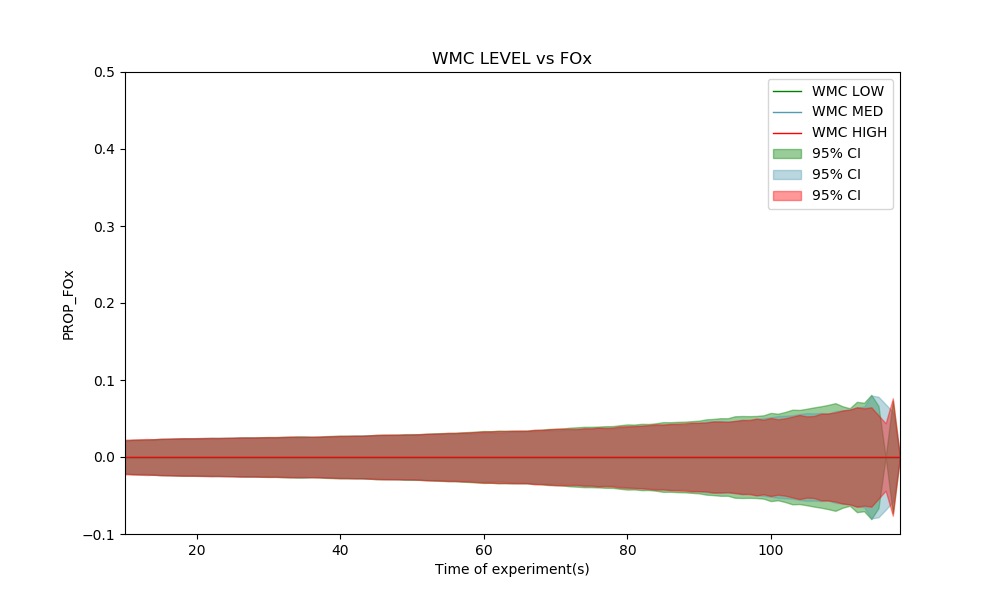

In [18]:
plot_CI([wmc_low, wmc_med, wmc_high], 'PROP_FOx', ['WMC LOW', 'WMC MED', 'WMC HIGH'], 'WMC LEVEL vs FOx')

## RM

In [19]:
add_CI_RM(wmc_low)
add_CI_RM(wmc_med)
add_CI_RM(wmc_high)

<IPython.core.display.Javascript object>


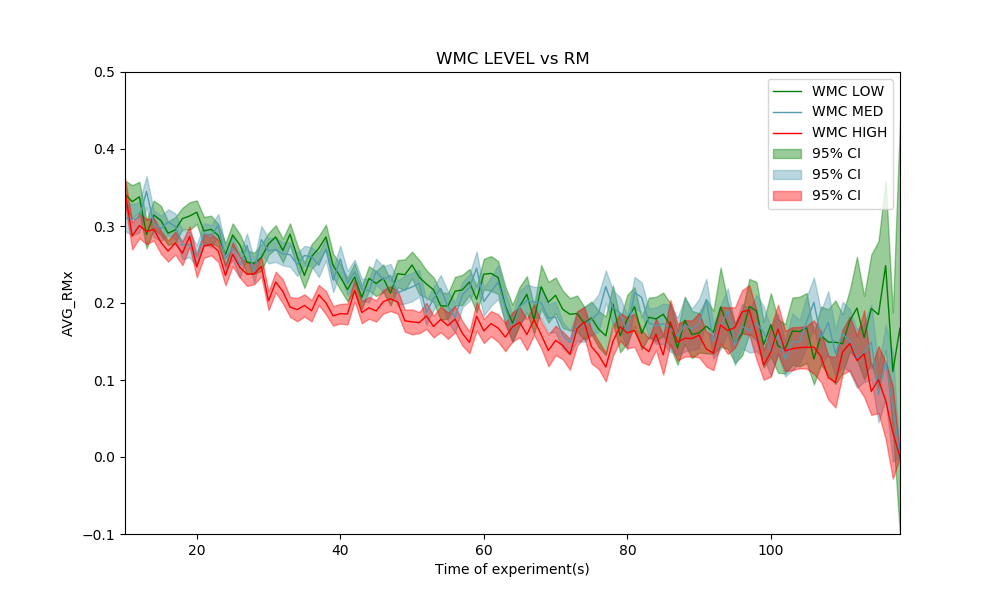

In [20]:
plot_CI([wmc_low, wmc_med, wmc_high], 'AVG_RMx', ['WMC LOW', 'WMC MED', 'WMC HIGH'], 'WMC LEVEL vs RM')

# LEVEL

## PROP_FOx

In [21]:
add_CI_PROP(lev_easy)
add_CI_PROP(lev_med)
add_CI_PROP(lev_hard)

<IPython.core.display.Javascript object>


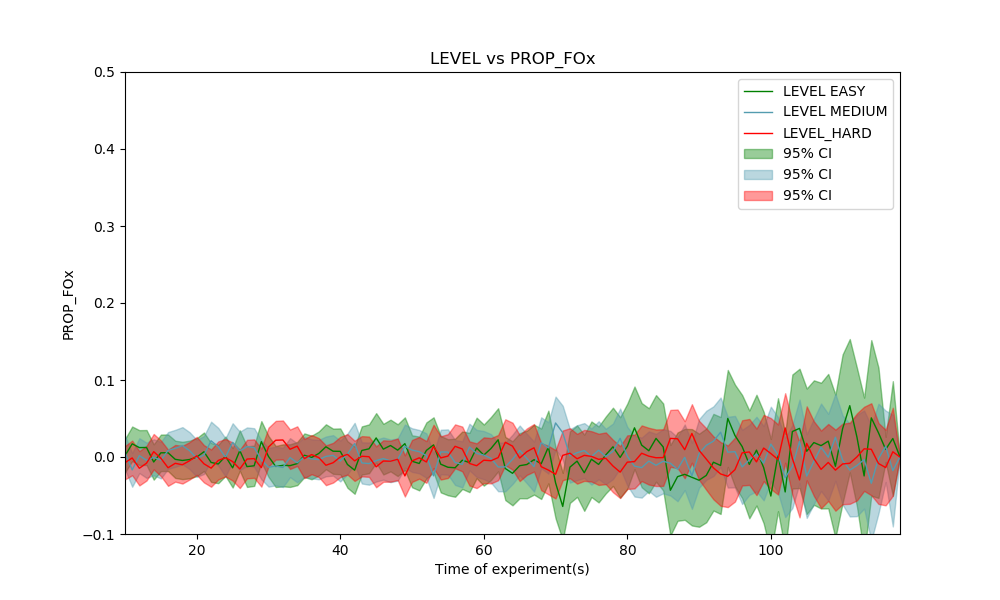

In [22]:
plot_CI([lev_easy, lev_med, lev_hard], 'PROP_FOx', ['LEVEL EASY', 'LEVEL MEDIUM', 'LEVEL_HARD'], 'LEVEL vs PROP_FOx')

## RM

In [23]:
add_CI_RM(lev_easy)
add_CI_RM(lev_med)
add_CI_RM(lev_hard)

<IPython.core.display.Javascript object>


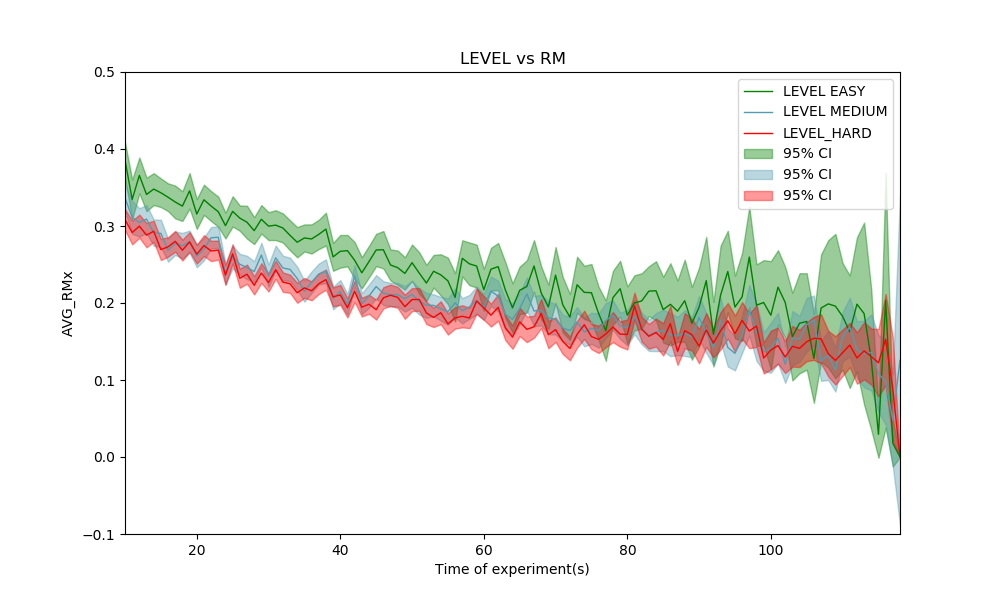

In [24]:
plot_CI([lev_easy, lev_med, lev_hard], 'AVG_RMx', ['LEVEL EASY', 'LEVEL MEDIUM', 'LEVEL_HARD'], 'LEVEL vs RM')

# TIME

## PROP_FOx

In [25]:
add_CI_PROP(time_short)
add_CI_PROP(time_med)
add_CI_PROP(time_long)

<IPython.core.display.Javascript object>


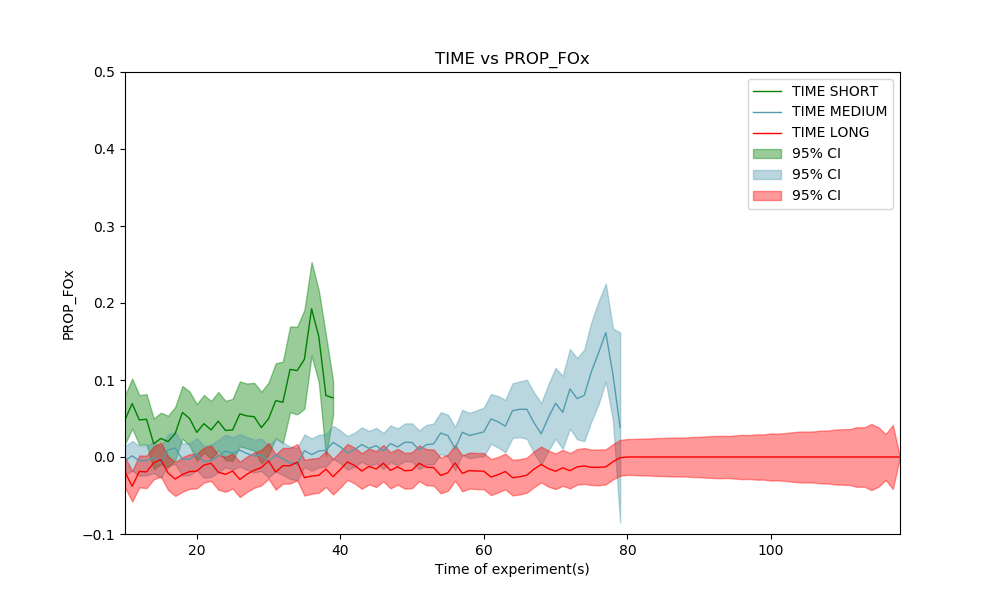

In [26]:
plot_CI([time_short, time_med, time_long], 'PROP_FOx', ['TIME SHORT', 'TIME MEDIUM', 'TIME LONG'], 'TIME vs PROP_FOx')

## RM

In [27]:
add_CI_RM(time_short)
add_CI_RM(time_med)
add_CI_RM(time_long)

<IPython.core.display.Javascript object>


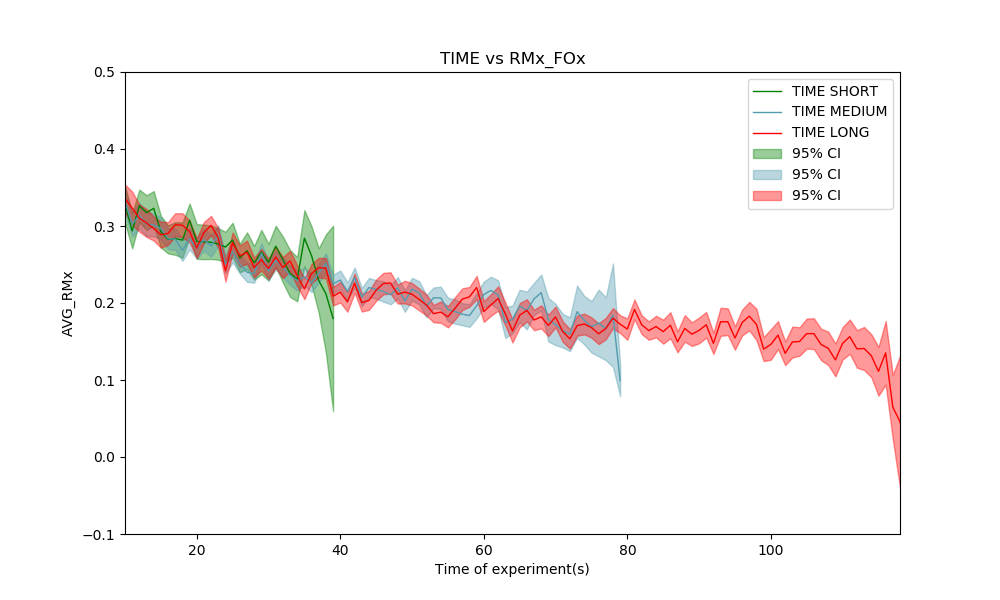

In [28]:
plot_CI([time_short, time_med, time_long], 'AVG_RMx', ['TIME SHORT', 'TIME MEDIUM', 'TIME LONG'], 'TIME vs RMx_FOx')

# FULL

## PROP_FOx

In [29]:
add_CI_PROP(full)
add_CI_PROP(corr)
add_CI_PROP(err)

<IPython.core.display.Javascript object>


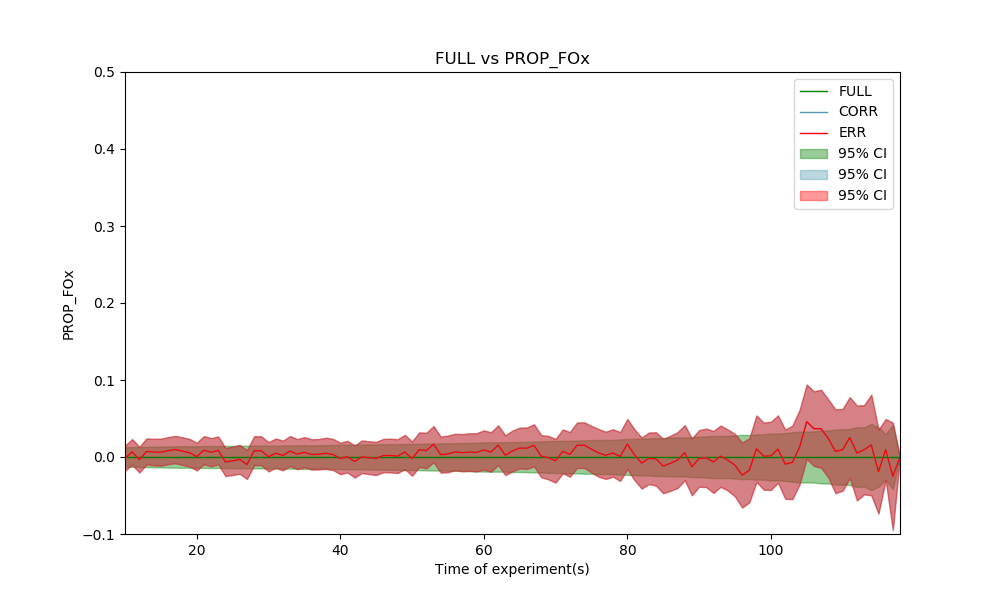

In [30]:
plot_CI([full, corr, err], 'PROP_FOx', ['FULL', 'CORR', 'ERR'], 'FULL vs PROP_FOx')

## RM

In [31]:
add_CI_RM(full)
add_CI_RM(corr)
add_CI_RM(err)

<IPython.core.display.Javascript object>


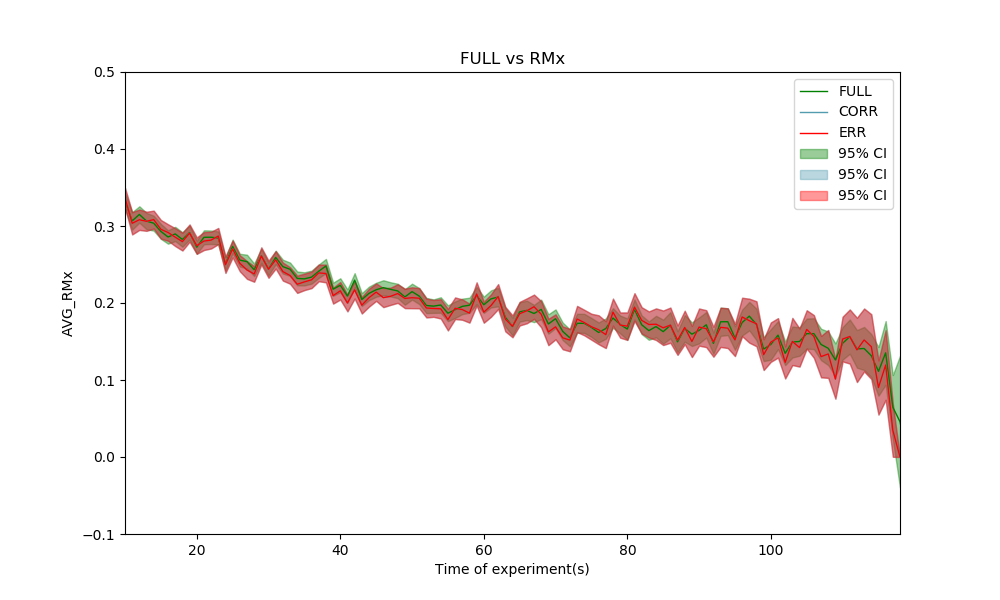

In [32]:
plot_CI([full, corr, err], 'AVG_RMx', ['FULL', 'CORR', 'ERR'], 'FULL vs RMx')